In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output
from MLP import *
from gridSearch import *

In [33]:
data = pd.read_csv('cup/ML-CUP20-TR.csv',sep=',',header=None,index_col=0)
data = data.to_numpy()

sep=1000 #separator training set - validation set
x=data[:,:-2]
y=data[:,-2:]
tx = data[:sep,:-2]
ty = data[:sep,-2:]
vx = data[sep:,:-2]
vy = data[sep:,-2:]

tx.shape, ty.shape, vy.shape

((1000, 10), (1000, 2), (524, 2))

In [33]:
n = MLP(  Nodes=[10,20,20,2], f='tanh', f_out='ide')
print('init', n.error(tx,ty))


init 1747.2718888267866


In [34]:
# care: if bs is small it's better to use high measure_interval as the error tends to zig-zag
n.train(tx, ty, 1e-03,
  a = 0.9,
  l = 1e-5,
  max_epochs = 30,
  tresh = .1,
  bs=30,
  measure_interval=20,
  val_x= vx, val_y=vy )
clear_output()

In [36]:
#final training
n.train(x, y, 1e-03,
  a = 0.9,
  l = 1e-5,
  max_epochs = 30,
  tresh = .1,
  bs=30,
  measure_interval=20)
clear_output()

6.151861867897903


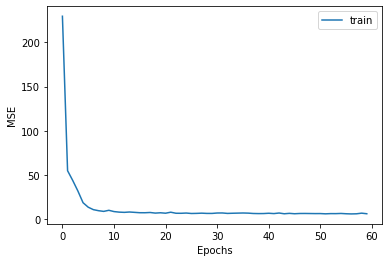

In [37]:
plt.plot(n.train_history[:],label = 'train')
#plt.plot(n.valid_history[:],label = 'valid')
plt.legend()
plt.ylabel('MSE')
plt.xlabel('Epochs')
print(n.train_history[-1])#,n.valid_history[-1])
#plt.savefig('CUP_images/CUP.eps',format='eps')
n.save('CUP_complete.net')

In [10]:
def lambda_study(lambdas):
    t=[] #train MSE
    v=[] #validation MSE
    for l in lambdas:
        n = MLP(  Nodes=[10,20,20,2], f='tanh', f_out='ide', w_range=.7)
        n.train(tx, ty, 1e-03,
            a = 0.9,
            l = l,
            max_epochs = 30,
            tresh = .1,
            bs=30,
            val_x= vx, val_y=vy )
        clear_output()
        t.append(n.train_history[-1])
        v.append(n.valid_history[-1])
    return t,v

def alpha_study(alphas):
    t=[] #train MSE
    v=[] #validation MSE
    for a in alphas:
        n = MLP(  Nodes=[10,20,20,2], f='tanh', f_out='ide', w_range=.7)
        n.train(tx, ty, 1e-03,
            a = a,
            l = 1e-5,
            max_epochs = 30,
            tresh = .1,
            bs=30,
            val_x= vx, val_y=vy )
        clear_output()
        t.append(n.train_history[-1])
        v.append(n.valid_history[-1])
    return t,v


In [11]:
alphas=1-np.logspace(-2,0,30)
ta,va=alpha_study(alphas)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


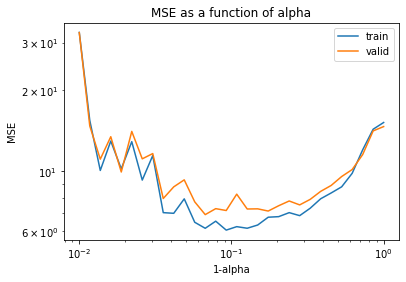

In [12]:
#plt.plot(alphas[:-1],ta[:-1],label='train')
#plt.plot(alphas[:-1],va[:-1],label='valid')
plt.plot(1-alphas,ta,label='train')
plt.plot(1-alphas,va,label='valid')
plt.xscale('log')
plt.yscale('log')
plt.title('MSE as a function of alpha')
plt.xlabel('1-alpha')
plt.ylabel('MSE')
plt.legend()
plt.savefig('CUP_images/alpha_study.eps',format='eps')

In [18]:
lambdas=np.logspace(-15,-1,50)
tl,vl=lambda_study(lambdas)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


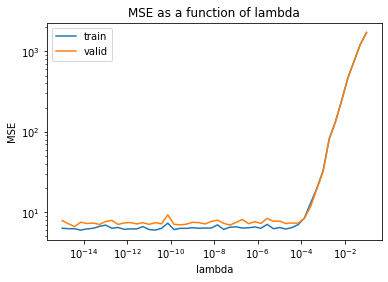

In [19]:
plt.plot(lambdas,tl,label='train')
plt.plot(lambdas,vl,label='valid')
plt.xscale('log')
plt.yscale('log')
plt.title('MSE as a function of lambda')
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.legend()
plt.savefig('CUP_images/lambda_study.eps',format='eps')

In [20]:
def batch_study(batches):
    t=[] #train MSE
    v=[] #validation MSE
    for b in batches:
        n = MLP(  Nodes=[10,20,20,2], f='tanh', f_out='ide', w_range=.7)
        n.train(tx, ty, 1e-03,
            a = 0.9,
            l = 1e-5,
            max_epochs = 30,
            tresh = .1,
            bs=int(b),
            val_x= vx, val_y=vy )
        clear_output()
        t.append(n.train_history[-1])
        v.append(n.valid_history[-1])
    return t,v

In [21]:
batches=np.logspace(0,np.log10(400),30)
tb,lb=batch_study(batches)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


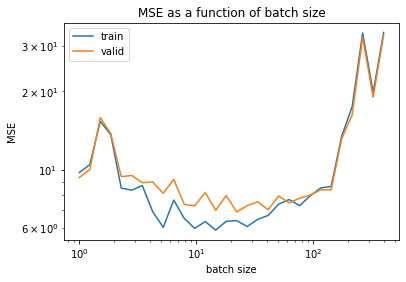

In [22]:
plt.plot(batches,tb,label='train')
plt.plot(batches,lb,label='valid')
plt.xscale('log')
plt.yscale('log')
plt.title('MSE as a function of batch size')
plt.xlabel('batch size')
plt.ylabel('MSE')
plt.legend()
plt.savefig('CUP_images/batches_study.eps',format='eps')

In [11]:
def xy(data):
    x = data[:,:-2]
    y = data[:,-2:]
    return x,y

params=[
        {
         'Nodes': [[10,10,10,2],[10,20,20,2],[10,30,30,2]],
         'f': ['tanh'],
         "f_out":['ide'],
         "weights_range": [.7],
         'learning_rate': [1e-02, 1e-03],
         'alpha': [5e-01, 9e-01],
         'lambda' : [0,1e-5]
        }
      ]

best_config,best_error=k_fold_CV(data, params, k=4, n_init=3, max_epochs=300, tresh=.1,
bs=30, measure_interval=10,xy=xy)


testing 24 configurations 

testing configuration {'Nodes': [10, 10, 10, 2], 'f': 'tanh', 'f_out': 'ide', 'weights_range': 0.7, 'learning_rate': 0.01, 'alpha': 0.5, 'lambda': 0}, 0/24
initialization 0
validation: 9.009723567835332, train: 6.706536213920729
initialization 1
validation: 8.381041634414807, train: 6.545270629477585
initialization 2
validation: 8.758644184452475, train: 6.738458180204203
best mean error for this config: 8.381041634414807 

testing configuration {'Nodes': [10, 10, 10, 2], 'f': 'tanh', 'f_out': 'ide', 'weights_range': 0.7, 'learning_rate': 0.01, 'alpha': 0.5, 'lambda': 1e-05}, 1/24
initialization 0
validation: 7.968190986526636, train: 6.14765532181306
initialization 1
validation: 8.575847246897315, train: 6.353829093886514
initialization 2
validation: 7.8888503816483055, train: 6.0162280589640496
best mean error for this config: 7.8888503816483055 

testing configuration {'Nodes': [10, 10, 10, 2], 'f': 'tanh', 'f_out': 'ide', 'weights_range': 0.7, 'learning_

In [40]:
file=open('CUP_complete.net','rb') #change the file to change the net
best=pickle.load(file)
print(best.train_history[-1])#,best.valid_history[-1])
file.close()
data = pd.read_csv('cup/ML-CUP20-TS.csv',sep=',',header=None,index_col=0)
data = data.to_numpy()
print(data.shape)
out=best(data).reshape(len(data),-1)
out=pd.DataFrame(out)
print(out)
out.to_csv('blind_test.csv',index_label=False)

6.151861867897903
(472, 10)
             0          1
0    40.857242 -32.718466
1    67.501657 -32.386738
2    75.552097 -26.686813
3    31.916614 -16.953343
4    65.278605 -33.573998
..         ...        ...
467  75.669713 -26.688205
468  31.033406 -13.069702
469  31.162971 -14.868596
470  39.821118 -31.225517
471  38.266077 -28.909033

[472 rows x 2 columns]
